In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as st

import matplotlib
import matplotlib.pyplot as plt

from scipy import stats
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from imblearn import under_sampling, over_sampling

### Stage 2

- Eksplorasi berbagai attributes
- Target output olahan data
- Mengecek apakah ada data bermasalah 
- Handling missing value 
- Handling duplicated data 
- Handling outlier data 
- Handling imbalanced data 
- Handling data redundan
- Handling data bermasalah lainnya 
- Penjelasan proses handling untuk setiap data yang bermasalah

In [2]:
df = pd.read_csv('health_insurance_train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [3]:
nums=['Age', 'Region_Code','Annual_Premium','Vintage']
cats=['Gender','Driving_License','Previously_Insured','Vehicle_Age','Vehicle_Damage','Response']

In [4]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [5]:
category = ['Gender', 'Vehicle_Age', 'Vehicle_Damage']

df[category].describe()

,Gender,Vehicle_Age,Vehicle_Damage
count,381109,381109,381109
unique,2,3,2
top,Male,1-2 Year,Yes
freq,206089,200316,192413


## Target Output (Response)

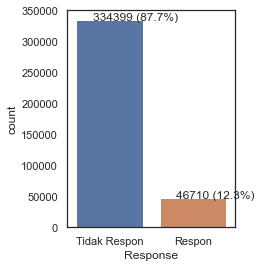

In [6]:
# RESPONSE

sns.set(style='white',font_scale=1.0)
fig = plt.figure(figsize=[3,4])
ax = sns.countplot(data=df,x='Response')
ax.set_xticklabels(['Tidak Respon','Respon'])
for p in ax.patches:
        ax.annotate(str(p.get_height())+' ('+str((p.get_height()/len(df)*100).round(1))+'%)', (p.get_x()+0.2, p.get_height()+400))

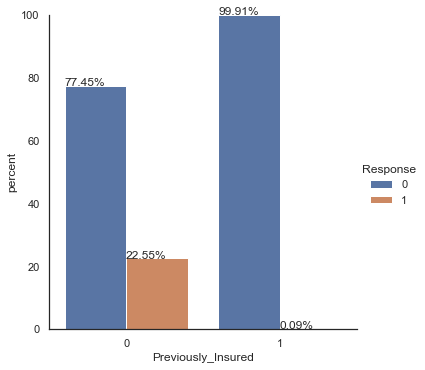

In [7]:
# RESPONSE & Previously Insured

x,y = 'Previously_Insured', 'Response'

df1_new = df.groupby(x)[y].value_counts(normalize=True)
df1_new = df1_new.mul(100)
df1_new = df1_new.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1_new)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)
plt.savefig('class.jpeg',transparent=True, bbox_inches='tight')

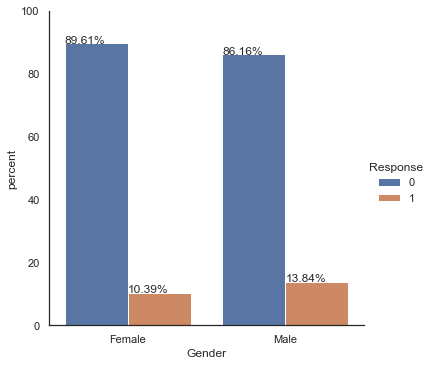

In [8]:
# GENDER & RESPONSE

x,y = 'Gender', 'Response'

df1_new = df.groupby(x)[y].value_counts(normalize=True)
df1_new = df1_new.mul(100)
df1_new = df1_new.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1_new)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)
plt.savefig('class.jpeg',transparent=True, bbox_inches='tight')

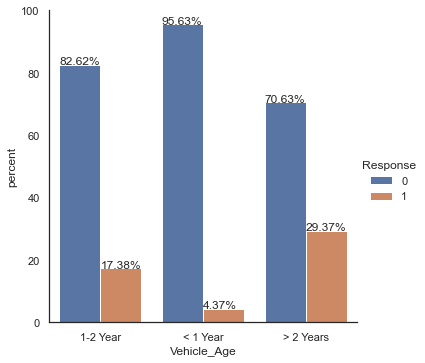

In [9]:
# RESPONSE & VA 

x,y = 'Vehicle_Age', 'Response'

df1_new = df.groupby(x)[y].value_counts(normalize=True)
df1_new = df1_new.mul(100)
df1_new = df1_new.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1_new)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)
plt.savefig('class.jpeg',transparent=True, bbox_inches='tight')

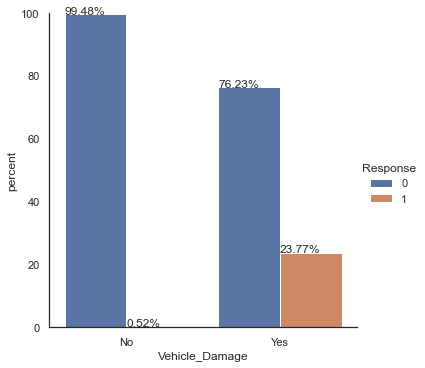

In [10]:
# RESPONSE & VD

x,y = 'Vehicle_Damage', 'Response'

df1_new = df.groupby(x)[y].value_counts(normalize=True)
df1_new = df1_new.mul(100)
df1_new = df1_new.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1_new)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)
plt.savefig('class.jpeg',transparent=True, bbox_inches='tight')

## Missing Data

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [12]:
df.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

## Duplicated Data

In [13]:
df.duplicated().sum()

0

In [14]:
df.duplicated(subset=['id','Vehicle_Age', 'Vehicle_Damage']).sum()

0

In [15]:
#drop id

df.duplicated(subset=['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured','Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response']).sum()

269

In [16]:
#Parameter keep

df = df.drop_duplicates(keep='first')
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


## Handling Outliers

<AxesSubplot:ylabel='Annual_Premium'>

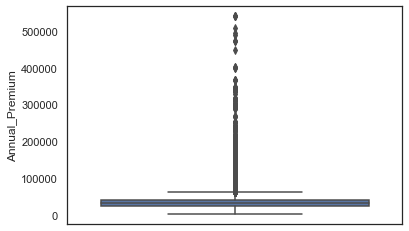

In [17]:
#OUTLIER

sns.boxplot(y = 'Annual_Premium', data = df)

In [3]:
#Berdasarkan Metode IQR 

print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')
filtered_entries = np.array([True] * len(df))

Q1 = df['Annual_Premium'].quantile(0.25)
Q3 = df['Annual_Premium'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5 * IQR)
high_limit = Q3 + (1.5 * IQR)
filtered_entities = ((df['Annual_Premium'] >= low_limit) & (df['Annual_Premium'] <= high_limit))
df = df[filtered_entities]

print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

Jumlah baris sebelum memfilter outlier: 381109
Jumlah baris setelah memfilter outlier: 370789


## Feature Engineering

In [3]:
df1 = df.copy()

merged_value = ['> 2 Years', '1-2 Year']
df1['Vehicle_Age'] = np.where(df1['Vehicle_Age'].isin(merged_value), '> 1 Year', '< 1 Year')

In [5]:
df1.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 1 Year,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,> 1 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 1 Year,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


## Feature Transformation

In [19]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,370789.000000,370789.000000,370789.000000,370789.000000,370789.000000,370789.000000,370789.000000,370789.000000,370789.000000
mean,190534.855484,38.670344,0.997942,26.437281,0.459666,29264.643973,112.542923,154.345442,0.121781
std,110036.802591,15.440166,0.045316,13.310391,0.498371,14743.056656,54.039616,83.670478,0.327033
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95219.000000,25.000000,1.000000,15.000000,0.000000,24102.000000,30.000000,82.000000,0.000000
50%,190529.000000,36.000000,1.000000,28.000000,0.000000,31319.000000,151.000000,154.000000,0.000000
75%,285823.000000,49.000000,1.000000,36.000000,1.000000,38596.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,61892.000000,163.000000,299.000000,1.000000


In [4]:
#standarisasi = age, vintage
#normalisasi = annual premium

from sklearn.preprocessing import MinMaxScaler, StandardScaler


df1['Annual_Premium_norm'] = MinMaxScaler().fit_transform(df['Annual_Premium'].values.reshape(len(df), 1))
df1['Age_std'] = StandardScaler().fit_transform(df['Age'].values.reshape(len(df), 1))
df1['Vintage_std'] = StandardScaler().fit_transform(df['Vintage'].values.reshape(len(df), 1))

In [6]:
df1.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Annual_Premium_norm,Age_std,Vintage_std
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,3.811090e+05,3.811090e+05
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563,0.051968,-9.258629e-16,-6.921441e-17
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936,0.032022,1.000001e+00,1.000001e+00
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000,0.000000,-1.213453e+00,-1.725174e+00
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000,0.040509,-8.911132e-01,-8.646631e-01
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000,0.054023,-1.819661e-01,-4.151927e-03
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000,0.068405,6.561169e-01,8.683108e-01
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000,1.000000,2.976962e+00,1.728822e+00


## Feature Encoding

In [22]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Annual_Premium_norm,Age_std,Vintage_std
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,0.638250,0.345182,0.748826
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0,0.521515,2.417701,0.342470
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,0.601802,0.539480,-1.521990
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,0.438544,-1.144442,0.581503
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0,0.419594,-0.626312,-1.378570


In [9]:
df1.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Annual_Premium_norm,Age_std,Vintage_std,Gender_Male,Vehicle_Age_> 1 Year,Vehicle_Damage_Yes
0,1,Male,44,1,28.0,0,> 1 Year,Yes,40454.0,26.0,217,1,0.070366,0.333777,0.748795,1,1,1
1,2,Male,76,1,3.0,0,> 1 Year,No,33536.0,26.0,183,0,0.057496,2.396751,0.342443,1,1,0
2,3,Male,47,1,28.0,0,> 1 Year,Yes,38294.0,26.0,27,1,0.066347,0.527181,-1.521998,1,1,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,0.048348,-1.148985,0.581474,1,0,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0,0.046259,-0.633242,-1.378580,0,0,0


In [5]:
# LABEL ENCODING

#gender
mapping_gender = {
    'Male': 1,
    'Female': 0
}
df1['Gender_Male'] = df1['Gender'].map(mapping_gender)



#Vehicle age 
mapping_VA = {
    '> 1 Year': 1,
    '< 1 Year': 0
}
df1['Vehicle_Age_> 1 Year'] = df1['Vehicle_Age'].map(mapping_VA)



#Vehicle damage
mapping_VD = {
    'Yes': 1,
    'No': 0
}
df1['Vehicle_Damage_Yes'] = df1['Vehicle_Damage'].map(mapping_VD)

In [7]:
df1.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Annual_Premium_norm,Age_std,Vintage_std,Gender_Male,Vehicle_Age_> 1 Year,Vehicle_Damage_Yes
0,1,Male,44,1,28.0,0,> 1 Year,Yes,40454.0,26.0,217,1,0.638250,0.345182,0.748826,1,1,1
1,2,Male,76,1,3.0,0,> 1 Year,No,33536.0,26.0,183,0,0.521515,2.417701,0.342470,1,1,0
2,3,Male,47,1,28.0,0,> 1 Year,Yes,38294.0,26.0,27,1,0.601802,0.539480,-1.521990,1,1,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,0.438544,-1.144442,0.581503,1,0,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0,0.419594,-0.626312,-1.378570,0,0,0


### Drop Kolom Outdated

In [6]:
# Membuang kolom yang tidak digunakan

df1 = df1.drop(columns=['Vehicle_Age', 'Vehicle_Damage','Gender','Age', 'Annual_Premium', 'Vintage'])

In [10]:
df1.head()

,Driving_License,Region_Code,Previously_Insured,Policy_Sales_Channel,Response,Annual_Premium_norm,Age_std,Vintage_std,Gender_Male,Vehicle_Age_> 1 Year,Vehicle_Damage_Yes
0,1,28.0,0,26.0,1,0.638250,0.345182,0.748826,1,1,1
1,1,3.0,0,26.0,0,0.521515,2.417701,0.342470,1,1,0
2,1,28.0,0,26.0,1,0.601802,0.539480,-1.521990,1,1,1
3,1,11.0,1,152.0,0,0.438544,-1.144442,0.581503,1,0,0
4,1,41.0,1,152.0,0,0.419594,-0.626312,-1.378570,0,0,0


In [26]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Driving_License       381109 non-null  int64  
 2   Region_Code           381109 non-null  float64
 3   Previously_Insured    381109 non-null  int64  
 4   Policy_Sales_Channel  381109 non-null  float64
 5   Response              381109 non-null  int64  
 6   Annual_Premium_norm   381109 non-null  float64
 7   Age_std               381109 non-null  float64
 8   Vintage_std           381109 non-null  float64
 9   Gender_Male           381109 non-null  int64  
 10  Vehicle_Age_> 1 Year  381109 non-null  int64  
 11  Vehicle_Damage_Yes    381109 non-null  int64  
dtypes: float64(5), int64(7)
memory usage: 34.9 MB


## Class Imbalance

<AxesSubplot:xlabel='Response', ylabel='count'>

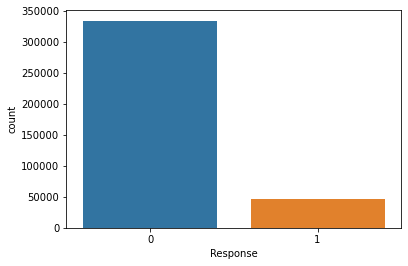

In [7]:
# Sebelum handling class imbalance
sns.countplot(x = 'Response', data = df1)

In [8]:
from imblearn import under_sampling, over_sampling

# Pemisahan fitur dan target
X = df1.drop(['Response'],axis=1)
x_columns = list(X.columns)
y = df1['Response']

# Under sampling
X_under, y_under = under_sampling.RandomUnderSampler(random_state=42).fit_resample(X, y)

# Mengubah numpy array ke Dataframe agar bisa diconcat
X_under = pd.DataFrame(X_under)
y_under = pd.DataFrame(y_under)

# Rename
X_under.columns = x_columns
y_under = y_under.rename(columns = {0: 'Response'})

# Concat dan buat dataframe baru
df_under = pd.concat([X_under,y_under], axis = 1)

# Drop id
df_under = df_under.drop('id',axis =1)

df_under.head()

,Driving_License,Region_Code,Previously_Insured,Policy_Sales_Channel,Annual_Premium_norm,Age_std,Vintage_std,Gender_Male,Vehicle_Age_> 1 Year,Vehicle_Damage_Yes,Response
0,1,19.0,1,152.0,0.096606,-1.084517,-0.804905,0,0,0,0
1,1,18.0,0,124.0,0.057315,1.171860,-1.091742,1,1,1,0
2,1,28.0,0,122.0,0.068269,1.623136,-1.306870,0,1,1,0
3,1,41.0,1,124.0,0.044473,0.849521,0.079509,1,1,0,0
4,1,7.0,0,152.0,0.047971,-1.148985,-0.745148,0,0,0,0


<AxesSubplot:xlabel='Response', ylabel='count'>

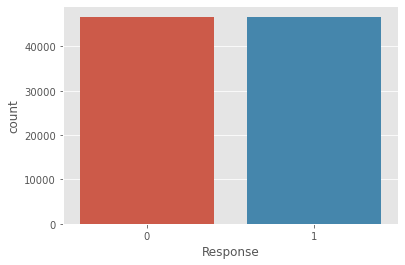

In [23]:
# Setelah class imbalance
sns.countplot(x = 'Response', data = df_under)

In [9]:
print(df_under['Response'].value_counts())
print(df_under.shape)

0    46710
1    46710
Name: Response, dtype: int64
(93420, 11)


### Penentuan Fitur

<AxesSubplot:>

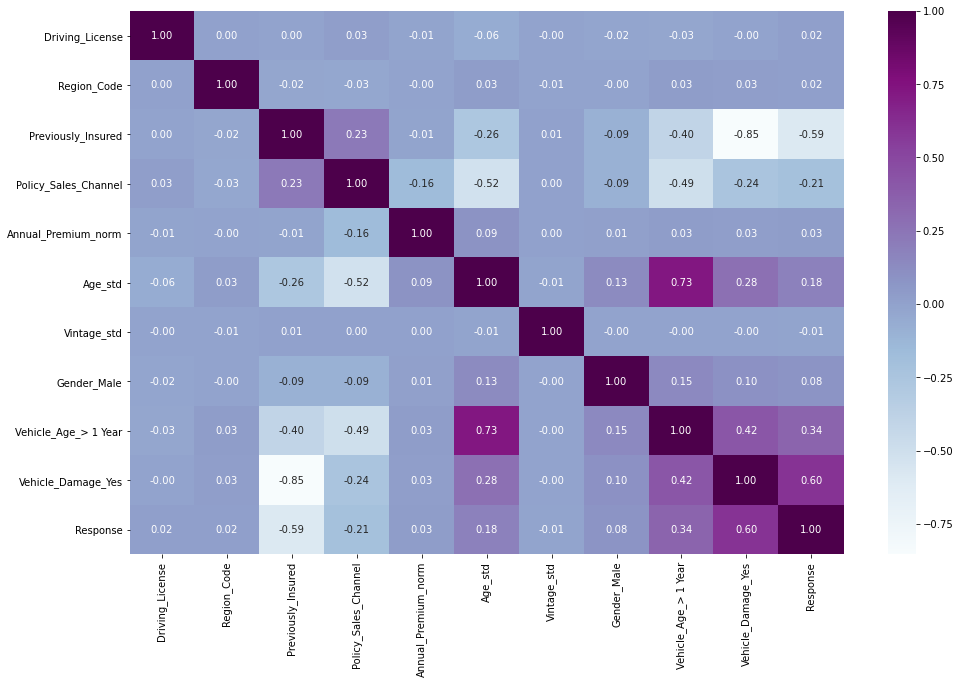

In [10]:
df_final = df_under

features = list(df_final.columns)
corr_= df_final[features].corr()
plt.figure(figsize=(16,10))
sns.heatmap(corr_, annot=True, fmt = ".2f", cmap = "BuPu")

Pada tahap awal, digunakan seluruh fitur dan membagi fitur-fitur berdasarkan tipe numerik dan kategori. Setelah melakukan Data Cleaning, selanjutnya fitur-fitur tersebut dilakukan fitur engineering, fitur transformation, dan fitur encoding. Setelah semua proses dilakukan, kami menemukan hanya beberapa fitur saja yang memiliki korelasi cukup tinggi. Berikut fitur yang akan digunakan dan di drop: 


a. Fitur yang di pakai:
   - Vehicle Damage (Yes)
   - Previously Insured
   - Vehicle Age (> 1 Year)
   - Age (standarisasi)


b. Fitur yang di drop:
   - id
   - Age > melakukan fitur transformasi menggunakan standarisasi
   - Vintage > melakukan fitur transformasi menggunakan standarisasi
   - Annual Premium > melakukan fitur transformasi menggunakan normalisasi

# Stage 3

1. Split Data Train & Test
2. Modeling (Algoritma yang diimplementasikan tidak terbatas yang diajarkan di kelas)
3. Model Evaluation: Pemilihan dan perhitungan metrics
4. Model Evaluation: Apakah model sudah best-fit?
5. Hyperparameter Tuning

**setiap buat model bisa diubah parameter dan critereon nya, biar akurasinya berubah

In [11]:
import pandas as pd
df = pd.read_csv('health_insurance_train.csv')

# Split Feature and Label
X = df1.drop(columns=['Response'], axis=1)
y = df1['Response'] # target / label

#Splitting the data into Train and Test
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [12]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [19]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [29]:
import numpy as np
np.unique(y_pred)

array([0])

In [29]:
model.predict_proba(X_test)

array([[0.99422151, 0.00577849],
       [0.9918412 , 0.0081588 ],
       [0.91743151, 0.08256849],
       ...,
       [0.9977031 , 0.0022969 ],
       [0.83657654, 0.16342346],
       [0.9310167 , 0.0689833 ]])

In [30]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.5168806689813855

In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def eval_classification(model, xtrain, ytrain, xtest, ytest):
    ypred = model.predict(xtest)
    print("Accuracy (Test Set): %.2f" % accuracy_score(ytest, ypred))
    print("Precision (Test Set): %.2f" % precision_score(ytest, ypred))
    print("Recall (Test Set): %.2f" % recall_score(ytest, ypred))
    print("F1-Score (Test Set): %.2f" % f1_score(ytest, ypred))
    
    y_pred_proba = model.predict_proba(xtest)
    print("AUC: %.2f" % roc_auc_score(ytest, y_pred_proba[:, 1]))    

In [32]:
#recall dan precision benerin di fitur engineering
#coba model ml yg lain
#coba parameter tuning yg lain

eval_classification(model, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.87
Precision (Test Set): 0.30
Recall (Test Set): 0.05
F1-Score (Test Set): 0.09
AUC: 0.81


In [33]:
y_pred_train = model.predict(X_train)
print("Precision (Train Set): %.2f" % precision_score(y_train, y_pred_train))

Precision (Train Set): 0.28


In [34]:
print('Train score: ' + str(model.score(X_train, y_train))) #accuracy
print('Test score:' + str(model.score(X_test, y_test))) #accuracy

Train score: 0.8689241462211811
Test score:0.869755566942654


In [35]:
training_data = df1.sample(frac=0.7, random_state=42)
testing_data = df1.drop(training_data.index)

print(f"No. of training examples: {training_data.shape[0]}")
print(f"No. of testing examples: {testing_data.shape[0]}")



No. of training examples: 259552
No. of testing examples: 111237


In [36]:
#PARAMETER TUNING

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train,y_train)


eval_classification(rf, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.87
Precision (Test Set): 0.39
Recall (Test Set): 0.07
F1-Score (Test Set): 0.12
AUC: 0.84
